In [1]:
# play audio in ipython notebook
try:
    import winsound
except ImportError:
    !pip install winsound
    import winsound
duration = 1000  # milliseconds
freq = 440  # Hz

try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime
    
import sys
sys.path.append('C:\\Users\\YASH\\nptel_face_recognition')
from utils import *

In [2]:
# %%capture
# !pip install pytesseract

time: 998 µs


In [3]:
# %%capture
# !pip install google 

time: 12 ms


In [7]:
import numpy as np
import time
tt = time.time()
import requests
import os
import pickle
from lxml import html
import numpy as np
import urllib.request
import face_recognition
import cv2
import matplotlib.pyplot as plt
import pytesseract
from googlesearch import search

time: 2 ms


In [5]:
def make_dict_from_lists(list1, list2, one2two = True):
    if one2two:
        final = {list1[i]:list2[i] for i in range(len(list1))}
    else:
        final = {list2[i]:list1[i] for i in range(len(list1))}

def make_rgb_bgr(img):
    b,g,r = cv2.split(img)          
    rgb_img = cv2.merge([r,g,b]) 
    return rgb_img

def read_bgr(path):
    return make_rgb_bgr(cv2.imread("sample.jpg", -1))

def imshowg(gray):
    plt.imshow(gray, cmap='gray')
    
def subimg(img, u=0,r=1,d=1,l=0):
    h = img.shape[0]
    b = img.shape[1]
    return img[int(h*u):int(h*d), int(b*l):int(b*r)]

def url_to_image(url):
    try:
        resp = urllib.request.urlopen(url)
        image = np.asarray(bytearray(resp.read()), dtype="uint8")
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        return image
    except Exception as e:
        print(e)
        print(url)
        
# get prof name from thumbnail


def get_img_from_homepage(site_url):
    

    return final_img
    
def write_img_from_thumbnail(image_url):
    

    img = get_img_from_homepage(site_url)
    plt.imshow(img)

    prof_img_name = prof_name.split('.')[1].strip()
    image_path  = known_faces_dir + '/' + prof_img_name + '.jpg'
    cv2.imwrite(image_path, img) 

time: 18 ms


In [6]:
image_url_list =['https://i.ytimg.com/vi/NzZXz3fJf6o/maxresdefault.jpg',  # cant get image from site
                 'https://i.ytimg.com/vi/KMj49syT8JM/maxresdefault.jpg',
                 'https://i.ytimg.com/vi/T3PsRW6wZSY/maxresdefault.jpg',
                 'https://i.ytimg.com/vi/KG4hjVDw-p8/maxresdefault.jpg',
                 'https://i.ytimg.com/vi/kNriKOJ-JuA/maxresdefault.jpg',
                 'https://i.ytimg.com/vi/DFMf9oPbuRI/maxresdefault.jpg']

time: 2.99 ms


In [10]:
# image_url = image_url_list[1]
idx = 0
# for image_url in [image_url_list[idx]]:
for image_url in image_url_list:
    st = tt
    img = url_to_image(image_url)
    img = make_rgb_bgr(img)

    tesseract_file_path = "C:/Users/YASH/AppData/Local/Tesseract-OCR/tesseract.exe"
    pytesseract.pytesseract.tesseract_cmd = tesseract_file_path
    img = subimg(img, u=0.8)

    # Convert the image to gray scale 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

    # change threshold (127)
    # draw bounding box
    ret, thresh1 = cv2.threshold(gray, 0, 127, cv2.THRESH_BINARY) 

    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18)) 

    # Appplying dilation on the threshold image 
    dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 
    # dilation = thresh1

    # Finding contours 
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,  
                                                     cv2.CHAIN_APPROX_NONE) 

    # Creating a copy of image 
    im2 = img.copy() 

    for cnt in contours: 
        x, y, w, h = cv2.boundingRect(cnt) 

        # Drawing a rectangle on copied image 
        rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2) 

        # Cropping the text block for giving input to OCR 
        cropped = im2[y:y + h, x:x + w] 

        # Apply OCR on the cropped image 
        text = pytesseract.image_to_string(cropped) 

    text = text.split(',')[0].replace('\n','').strip().lower()
    print(text)
    print(f'time: {tt-st}')

prof. soumya kanti ghosh
time: 0.0
prof. meenakshi d'souza
time: 0.0

time: 0.0
prof. partha pratim dasiit kharagpur
time: 0.0

time: 0.0

time: 0.0
time: 13.9 s


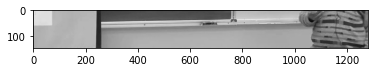

time: 396 ms


In [11]:
# img = cv2.imread("sample.jpg") 

imshowg(gray)
# imshowg(gray[70:80, 70:80])
# imshowg(thresh1)
# imshowg(thresh1[70:80, 70:80])
# imshowg(dilation)
# plt.imshow(np.array([[[255,255,255]]]))
# plt.imshow(img)
# plt.imshow(img[70:80, 70:80])